In [1]:
# !pip install mediapipe

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## KEYPOINT EXTRACTION

In [3]:
mp

<module 'mediapipe' from 'H:\\PYTHON\\PYTHON SYSTEM FILES\\Lib\\site-packages\\mediapipe\\__init__.py'>

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
mp_holistic

<module 'mediapipe.python.solutions.holistic' from 'H:\\PYTHON\\PYTHON SYSTEM FILES\\Lib\\site-packages\\mediapipe\\python\\solutions\\holistic.py'>

In [2]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [3]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [4]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture("J:/AUTISM DETECTION PROJECT/3DCNN/videos/fear/fear20.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [ ]:
# frame

In [ ]:
# from PIL import Image
# import numpy as np

# # Open the image using Pillow (PIL)
# image_path = "20.jpg"
# image = Image.open(image_path)

# # Convert the image to a NumPy array
# image_array = np.array(image)

In [ ]:
# image_array

In [10]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    image, results = mediapipe_detection(frame, holistic)

    draw_landmarks(frame, results)

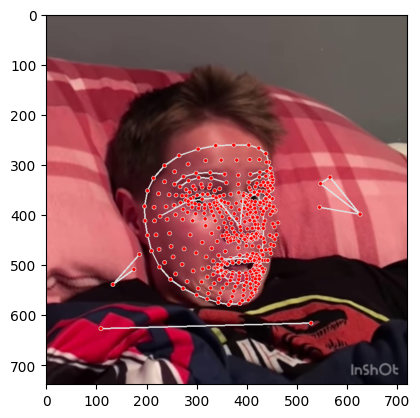

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
len(results.face_landmarks.landmark)

468

In [14]:
results.pose_landmarks.landmark

[x: 0.5388564
y: 0.575464
z: -1.5498526
visibility: 0.9986638
, x: 0.54673904
y: 0.49139738
z: -1.3884562
visibility: 0.99843544
, x: 0.565902
y: 0.48984897
z: -1.3886501
visibility: 0.9981937
, x: 0.58679533
y: 0.48848808
z: -1.3884065
visibility: 0.99827313
, x: 0.47086573
y: 0.49648035
z: -1.4640871
visibility: 0.9986677
, x: 0.43248826
y: 0.500751
z: -1.4642203
visibility: 0.9987154
, x: 0.39413038
y: 0.50648403
z: -1.4650378
visibility: 0.998847
, x: 0.5935075
y: 0.50955117
z: -0.49051067
visibility: 0.9987018
, x: 0.31599402
y: 0.54640985
z: -0.8185109
visibility: 0.9992507
, x: 0.5659709
y: 0.66017556
z: -1.2053157
visibility: 0.9973092
, x: 0.48713306
y: 0.6614058
z: -1.302961
visibility: 0.99794275
, x: 0.733456
y: 0.8357334
z: 0.10873563
visibility: 0.96002686
, x: 0.15182352
y: 0.8502362
z: -0.6573531
visibility: 0.9400357
, x: 1.1944579
y: 0.849429
z: -0.61954904
visibility: 0.74289626
, x: -0.08426729
y: 1.0021756
z: -1.695922
visibility: 0.66202074
, x: 0.87027293
y: 0.54

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose

[array([ 0.53885639,  0.57546401, -1.54985261,  0.99866378]),
 array([ 0.54673904,  0.49139738, -1.38845623,  0.99843544]),
 array([ 0.56590199,  0.48984897, -1.38865006,  0.99819368]),
 array([ 0.58679533,  0.48848808, -1.38840652,  0.99827313]),
 array([ 0.47086573,  0.49648035, -1.46408713,  0.99866772]),
 array([ 0.43248826,  0.50075102, -1.46422029,  0.9987154 ]),
 array([ 0.39413038,  0.50648403, -1.46503782,  0.99884701]),
 array([ 0.59350753,  0.50955117, -0.49051067,  0.99870181]),
 array([ 0.31599402,  0.54640985, -0.81851089,  0.99925071]),
 array([ 0.5659709 ,  0.66017556, -1.20531571,  0.99730921]),
 array([ 0.48713306,  0.6614058 , -1.30296099,  0.99794275]),
 array([0.73345602, 0.83573341, 0.10873563, 0.96002686]),
 array([ 0.15182352,  0.85023618, -0.6573531 ,  0.9400357 ]),
 array([ 1.19445789,  0.84942901, -0.61954904,  0.74289626]),
 array([-0.08426729,  1.00217557, -1.69592202,  0.66202074]),
 array([ 0.87027293,  0.54172695, -1.24439502,  0.79153365]),
 array([ 0.1

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [21]:
len(face)

1404

In [22]:
lh,rh

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [23]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [24]:
face

array([ 0.55714506,  0.65129602, -0.04379381, ...,  0.6175642 ,
        0.47862861,  0.06935686])

In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [26]:
result_test = extract_keypoints(results)

In [27]:
result_test

array([ 0.53885639,  0.57546401, -1.54985261, ...,  0.        ,
        0.        ,  0.        ])

In [28]:
468*3+33*4+21*3+21*3

1662

In [29]:
len(result_test)

1662

In [30]:
np.save('0', result_test)

In [31]:
np.load('0.npy')

array([ 0.53885639,  0.57546401, -1.54985261, ...,  0.        ,
        0.        ,  0.        ])

## DATA ARRANGEMENT

In [32]:
# !pip install moviepy

In [17]:
DATA_PATH = os.path.join('data') 

# Actions that we try to detect
actions = np.array(['happy','sad','anger','surprise','fear','neutral'])
actions.sort()

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 60

# Folder start
start_folder = 60

In [34]:
os.makedirs('data/', exist_ok=True)

# Create subdirectories for each action
for action in actions:
    action_directory = os.path.join('data', action)
    os.makedirs(action_directory, exist_ok=True)

In [89]:
import cv2
import os

# Video file path
video_path = 'J:/AUTISM DETECTION PROJECT/3DCNN/videos/surprise/surprise14.mp4'

# Create a directory to save frames
output_directory = 'data/surprise'
os.makedirs(output_directory, exist_ok=True)

# Open the video file
cap = cv2.VideoCapture(video_path)

frame_count = 0
folder_count = 30
frame_per_folder = 60
fps = int(cap.get(cv2.CAP_PROP_FPS))

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break

        image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
        draw_styled_landmarks(image, results)
    
        
    
        if frame_count % frame_per_folder == 0:
            current_folder = os.path.join(output_directory, f'{folder_count}')
            os.makedirs(current_folder, exist_ok=True)
            folder_count += 1

        keypoints = extract_keypoints(results)
        frame_name = os.path.join(current_folder, f'{frame_count % frame_per_folder}.npy')
        
        np.save(frame_name, keypoints)
    
        frame_count += 1
    
        if frame_count >= frame_per_folder * folder_count:
            break
    
    # Release the video capture object
cap.release()

# Close all OpenCV windows (if any were opened)
cv2.destroyAllWindows()


## Preprocess Data and Create Labels and Features

In [74]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [79]:
label_map = {label:num for num, label in enumerate(actions)}

In [80]:
label_map

{'anger': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}

In [81]:
DATA_PATH

'data'

In [91]:
# import os

# # Define the base directory
# base_directory = 'data'

# # Iterate through the subdirectories in the base directory
# for root, dirs, files in os.walk(base_directory):
#     for subdir in dirs:
#         # Create the full path to the subdirectory
#         subdir_path = os.path.join(root, subdir)
#         # Use os.listdir to get the list of files in the subdirectory and count them
#         file_count = len(os.listdir(subdir_path))
#         if(file_count < 60):
#             print(f"Number of files in '{subdir_path}': {file_count}")


In [92]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [95]:
np.array(sequences).shape

(180, 60, 1662)

In [97]:
np.array(labels).shape

(180,)

In [98]:
X = np.array(sequences)

In [99]:
X.shape

(180, 60, 1662)

In [100]:
y = to_categorical(labels).astype(int)

In [101]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [103]:
y_test.shape

(9, 6)

## Build Network

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [105]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [109]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(60,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [110]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [112]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
6/6 [==============================] - 6s 414ms/step - loss: 955.6044 - categorical_accuracy: 0.1696
Epoch 2/2000
6/6 [==============================] - 3s 409ms/step - loss: 182.5567 - categorical_accuracy: 0.1520
Epoch 3/2000
6/6 [==============================] - 2s 407ms/step - loss: 130.0758 - categorical_accuracy: 0.2047
Epoch 4/2000
6/6 [==============================] - 2s 405ms/step - loss: 166.8408 - categorical_accuracy: 0.1930
Epoch 5/2000
6/6 [==============================] - 2s 394ms/step - loss: 60.8335 - categorical_accuracy: 0.1813
Epoch 6/2000
6/6 [==============================] - 2s 386ms/step - loss: 88.9557 - categorical_accuracy: 0.2222
Epoch 7/2000
6/6 [==============================] - 2s 397ms/step - loss: 451.3102 - categorical_accuracy: 0.1871
Epoch 8/2000
6/6 [==============================] - 2s 386ms/step - loss: 821.0976 - categorical_accuracy: 0.1111
Epoch 9/2000
6/6 [==============================] - 2s 388ms/step - loss: 482.2104 - categ

In [113]:
res = model.predict(X_test)

1/1 [==============================] - 1s 992ms/step


In [114]:
X_test

array([[[ 0.49755001,  0.3348096 , -0.48338491, ...,  0.59263122,
          0.64851618, -0.01268078],
        [ 0.49799043,  0.33472252, -0.59046143, ...,  0.58778709,
          0.6419813 , -0.00864008],
        [ 0.49824739,  0.33470541, -0.61461359, ...,  0.59581441,
          0.64073104, -0.0126724 ],
        ...,
        [ 0.39464578,  0.42126584, -0.51109415, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.47131705,  0.3586261 ,  0.01732052, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.48955637,  0.43732601, -0.1342274 , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.51248354,  0.14859436, -0.23538131, ...,  0.53707123,
          0.27938843, -0.01017646],
        [ 0.49821216,  0.14920662, -0.2217012 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.48825398,  0.14889216, -0.23016204, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.54838288,  0.18569389, -0.17643639, ...,  

In [115]:
res

array([[0.15801902, 0.16498192, 0.17128351, 0.17071812, 0.16367942,
        0.17131801],
       [0.15801902, 0.16498192, 0.17128351, 0.17071812, 0.16367942,
        0.17131801],
       [0.15801902, 0.16498192, 0.17128351, 0.17071812, 0.16367942,
        0.17131801],
       [0.15801902, 0.16498192, 0.17128351, 0.17071812, 0.16367942,
        0.17131801],
       [0.15801902, 0.16498192, 0.17128351, 0.17071812, 0.16367942,
        0.17131801],
       [0.15801902, 0.16498192, 0.17128351, 0.17071812, 0.16367942,
        0.17131801],
       [0.15801902, 0.16498192, 0.17128351, 0.17071812, 0.16367942,
        0.17131801],
       [0.15801902, 0.16498192, 0.17128351, 0.17071812, 0.16367942,
        0.17131801],
       [0.15801902, 0.16498193, 0.17128353, 0.17071813, 0.16367942,
        0.17131802]], dtype=float32)

In [116]:
actions[np.argmax(res[4])]

'surprise'

In [117]:
actions[np.argmax(y_test[4])]

'anger'

In [118]:
model.save('action.h5')

H:\PYTHON\PYTHON SYSTEM FILES\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [119]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [120]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 78ms/step


In [121]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [122]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[6, 0],
        [3, 0]],

       [[7, 0],
        [2, 0]],

       [[8, 0],
        [1, 0]],

       [[8, 0],
        [1, 0]],

       [[8, 0],
        [1, 0]],

       [[0, 8],
        [0, 1]]], dtype=int64)

In [123]:
accuracy_score(ytrue, yhat)

0.1111111111111111

In [34]:
res

array([0.15801902, 0.16498193, 0.17128353, 0.17071813, 0.16367942,
       0.17131802], dtype=float32)

In [124]:
from scipy import stats

In [28]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (255, 0, 0), (0, 255, 0), (0, 0, 255)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

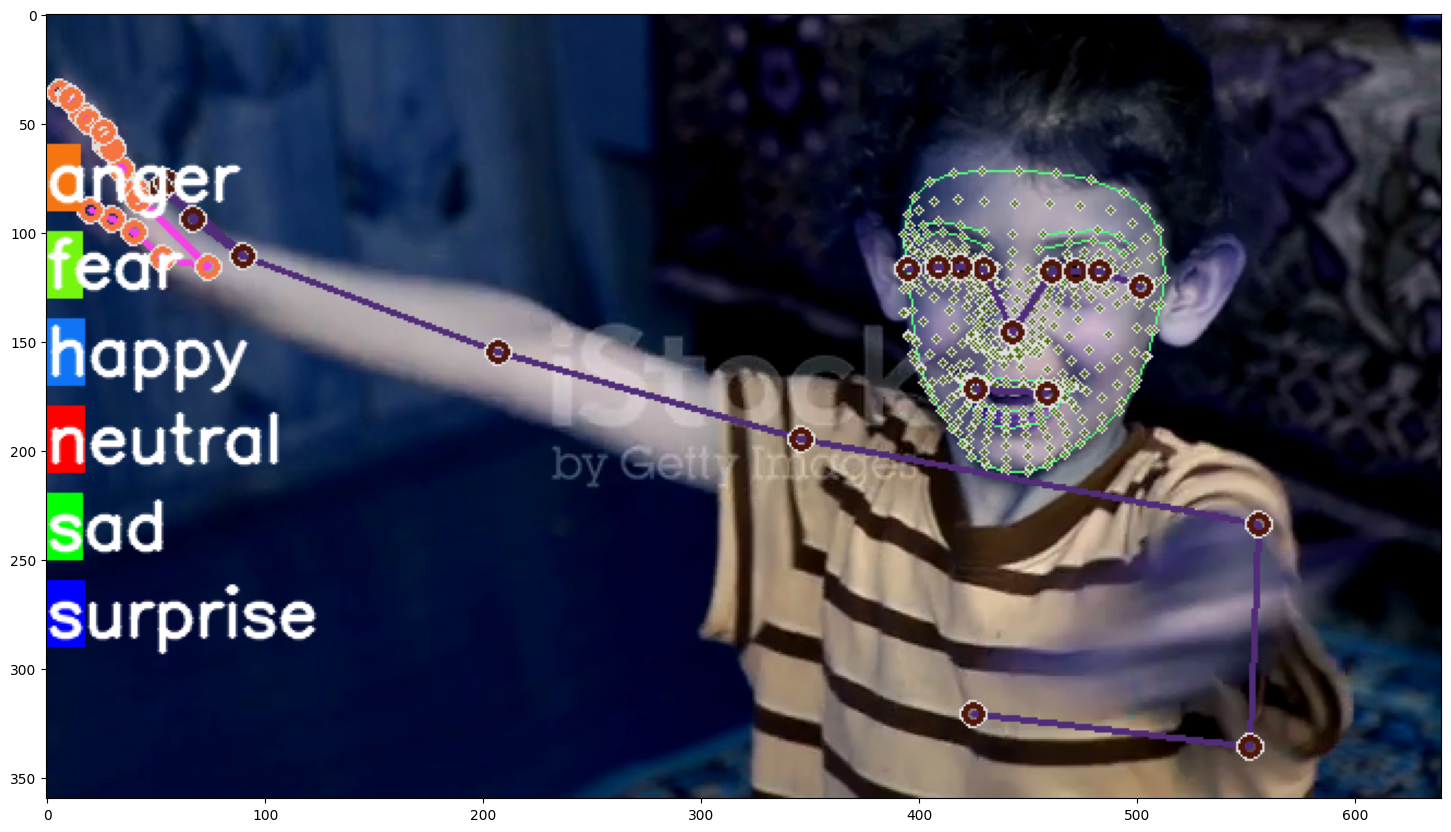

In [29]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [11]:
import tensorflow as tf

In [14]:
model = tf.keras.models.load_model("action.h5")

In [31]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture("fear20.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        if not ret or frame is None:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-60:]
        
        if len(sequence) == 60:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [32]:
res

array([0.15801902, 0.16498193, 0.17128353, 0.17071813, 0.16367942,
       0.17131802], dtype=float32)

In [33]:
history

import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results